In [1]:
import numpy as np
import matplotlib.pyplot as plt

import cv2
import pickle

from keras.models import load_model

# load encoder

In [ ]:
with open("../encoded/captcha_encoder.bin" , "rb") as f:
    encoder = pickle.load(f)

# load model

In [ ]:
model_one = load_model("../saved-models/captcha_model_one.h5")
model_two = load_model("../saved-models/captcha_model_two.h5")
model_three = load_model("../saved-models/captcha_model_three.h5")
model_four = load_model("../saved-models/captcha_model_four.h5")

In [4]:
def predict_model(model1 , model2 , model3 , model4  , img):
    img_array = cv2.imread(img)
    img_array_2d = cv2.cvtColor(img_array , cv2.COLOR_BGR2GRAY)
    img_array_2d = cv2.bitwise_not(img_array_2d)
    img_array_2d = img_array_2d / 255.0

    plt.figure(figsize=(5,5))
    plt.imshow(img_array_2d , "gray")

    result_one = model1.predict(img_array_2d.reshape(1 , 24 , 72 , 1))

    result_two = model2.predict(img_array_2d.reshape(1 , 24 , 72 , 1))

    result_three = model3.predict(img_array_2d.reshape(1 , 24 , 72 , 1))

    result_four = model4.predict(img_array_2d.reshape(1 , 24 , 72 , 1))


    char_one = encoder.inverse_transform([np.argmax(result_one)])
    char_two = encoder.inverse_transform([np.argmax(result_two)])
    char_three = encoder.inverse_transform([np.argmax(result_three)])
    char_four = encoder.inverse_transform([np.argmax(result_four)])


    result = char_one + char_two + char_three + char_four

    print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
['QX5B']


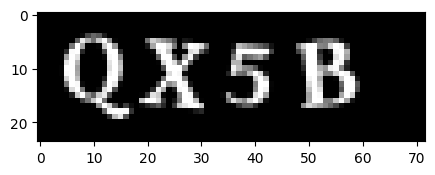

In [ ]:
predict_model(model_one , model_two , model_three , model_four , "../datasets/captcha-samples-wordpress/test/QX5B.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
['LUTP']


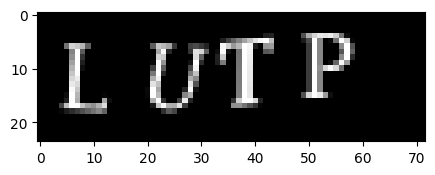

In [ ]:
predict_model(model_one , model_two , model_three , model_four , "../datasets/captcha-samples-wordpress/test/LUTP.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
['C7G3']


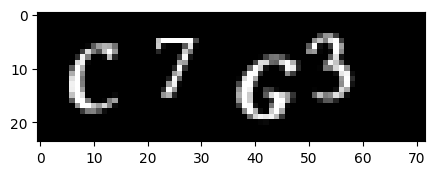

In [ ]:
predict_model(model_one , model_two , model_three , model_four , "../datasets/captcha-samples-wordpress/test/C7G3.png")